In [1]:
##################################################################################
#                                                                                #
#                         Display Comparison Results                             #
#                                                                                #
##################################################################################

In [2]:
# =====================
# Imports
# =====================
import os
from os import listdir
from os.path import isfile, join
import pickle

In [3]:
def mean(elements):
    return sum(elements) / float(len(elements))

def percentile(elements, perc=50):
    perc_idx = int(len(elements) * perc / 100.0)
    return sorted(elements)[perc_idx]

In [4]:
##################################################################################
#                                                                                #
#                       Table Comparison Summary                                 #
#                                                                                #
##################################################################################


model_path = os.getcwd() + "/Models/"
network_names = [f for f in listdir(model_path) if isfile(join(model_path, f))]
network_names = network_names[0:2]

for network_name in network_names:
    for lp_norm in ['l_2', 'l_inf']:

        print('===========================================')
        print('NETWORK COMPARISON SUMMARY:')
        print('===========================================')

        if lp_norm == 'l_2':
            methods = ['Geocert', 'Lip_Lin']
        elif lp_norm == 'l_inf':
            methods = ['Geocert', 'Lip_Lin', 'MIP']
        else:
            raise NotImplementedError

        for method in methods:
            # =====================
            # Load and Display Output
            # =====================
            print('------------------------------------')
            print('Method:  ', method)
            print('------------------------------------')
            cwd = os.getcwd()
            filename = cwd + "/Results/Small_nets/" + method + "_out_"+str(network_name[0:-4])+"_"+lp_norm+".pkl"
            f = open(filename,"rb")
            output_dict = pickle.load(f)
            f.close()

            for k, v in output_dict.items():
                if k not in ['min_dists', 'pgd_dists', 'times']:
                    continue
                print('-' * 20, k, '-' * 20)
                print('MEAN   ', mean(v))
                print('25th   ', percentile(v, 25))
                print('MEDIAN ', percentile(v, 50))
                print('90     ', percentile(v, 90))
                print('\n')


NETWORK COMPARISON SUMMARY:
------------------------------------
Method:   Geocert
------------------------------------
-------------------- min_dists --------------------
MEAN    1.7239000343805118
25th    1.3482345476597037
MEDIAN  1.7757016529354002
90      2.4594760021610513


-------------------- pgd_dists --------------------
MEAN    4.930787347286241
25th    3.134307384490967
MEDIAN  4.146407604217529
90      8.734031677246094


-------------------- times --------------------
MEAN    2.405311865732074
25th    2.083401918411255
MEDIAN  2.191211462020874
90      3.19797945022583


------------------------------------
Method:   Lip_Lin
------------------------------------
-------------------- min_dists --------------------
MEAN    1.2282886921677694
25th    0.9215672411005242
MEDIAN  1.2145110083628219
90      1.8224841783952406


-------------------- times --------------------
MEAN    0.009380068629980087
25th    0.007967472076416016
MEDIAN  0.00884699821472168
90      0.012007474

In [34]:
##################################################################################
#                                                                                #
#                       Table Comparison ACAS_X                                  #
#                                                                                #
##################################################################################


model_path = os.getcwd() + "/Models/Acas_xu/"
network_names = [f for f in listdir(model_path) if isfile(join(model_path, f))]
network_names = network_names[0:2]

deltas = []

for network_name in network_names:
    for lp_norm in ['l_inf',]:

        print('===========================================')
        print('NETWORK COMPARISON SUMMARY:')
        print('===========================================')
        print('Network:   ', network_name)
        
        methods = ['Geocert', 'MIP']
        for method in methods:
            # =====================
            # Load and Display Output
            # =====================
            print('------------------------------------')
            print('Method:  ', method)
            print('------------------------------------')
            cwd = os.getcwd()
            filename = cwd + "/Results/Acas_xu/" + method + "_out_"+str(network_name)+"_"+lp_norm+".pkl"
            f = open(filename,"rb")
            output_dict = pickle.load(f)
            f.close()

            print('times:')
            print(output_dict['times'])
            

NETWORK COMPARISON SUMMARY:
Network:    acas_xu_net_copy_paste
------------------------------------
Method:   Geocert
------------------------------------
times:
[147.08922743797302]
------------------------------------
Method:   MIP
------------------------------------
times:
[14.291095495223999]


In [36]:
##################################################################################
#                                                                                #
#                       LB / UB Comparison                                       #
#                                                                                #
##################################################################################


model_path = os.getcwd() + "/Models/"
network_names = [f for f in listdir(model_path) if isfile(join(model_path, f))]
network_names = network_names[0:2]

for network_name in network_names:
    for lp_norm in ['l_2', 'l_inf']:

#         if lp_norm == 'l_2':
#             methods = ['Geocert', 'Lip_Lin']
#         elif lp_norm == 'l_inf':
#             methods = ['Geocert', 'Lip_Lin', 'MIP']
#         else:
#             raise NotImplementedError


        methods = ['Geocert',]

        for method in methods:
            # =====================
            # Load and Display Output
            # =====================
            cwd = os.getcwd()
            filename = cwd + "/Results/Small_nets/" + method + "_out_"+str(network_name[0:-4])+"_"+lp_norm+".pkl"
            f = open(filename,"rb")
            output_dict = pickle.load(f)
            f.close()


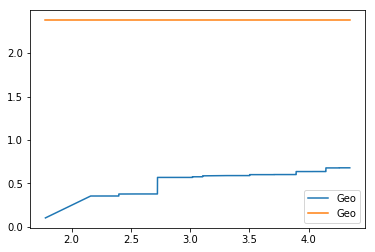

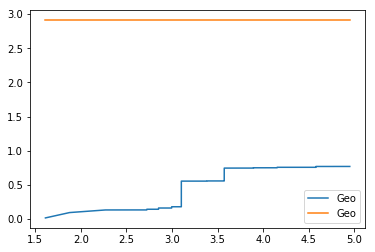

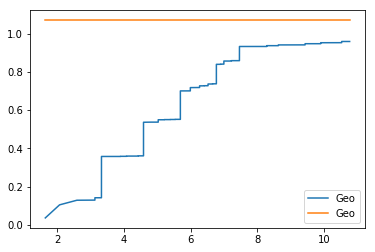

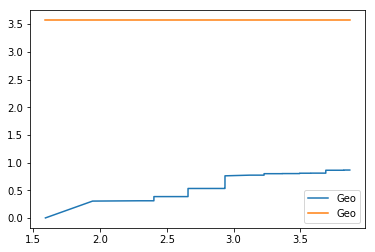

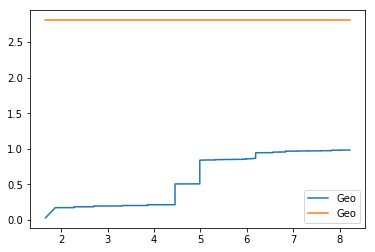

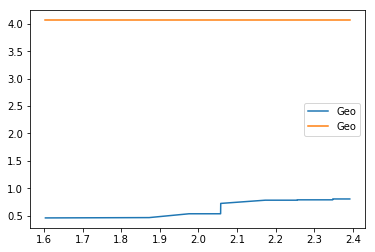

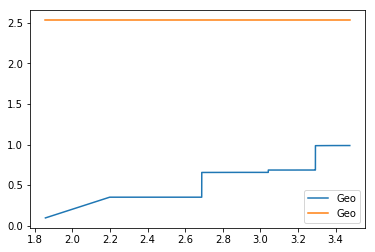

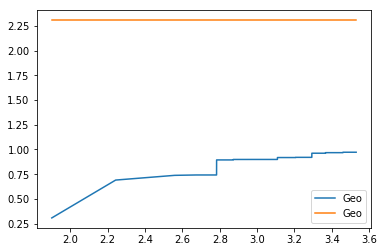

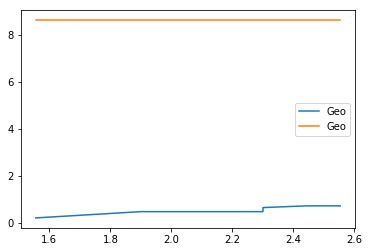

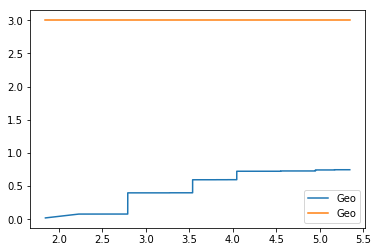

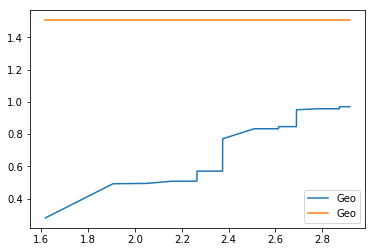

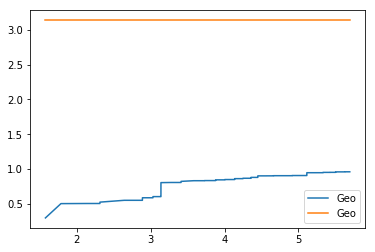

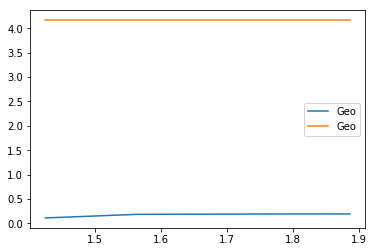

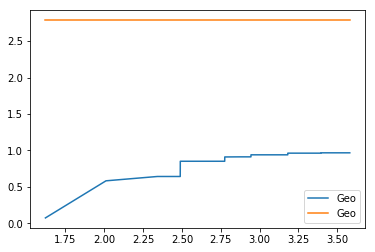

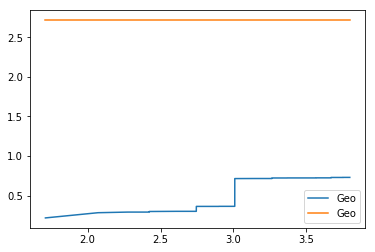

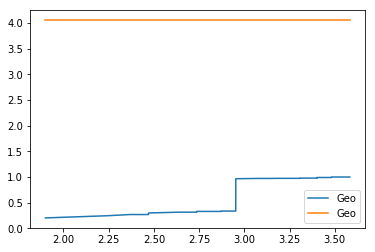

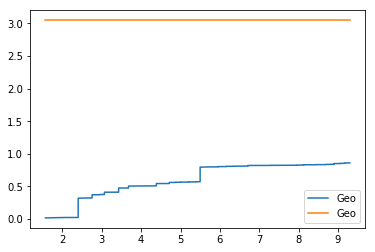

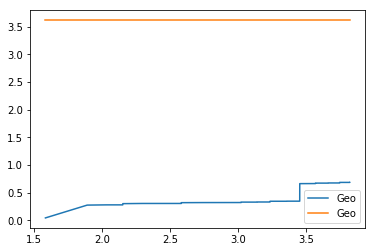

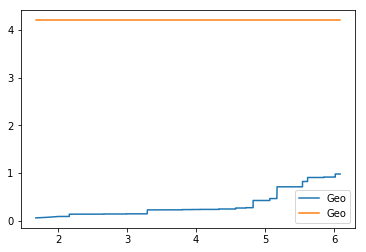

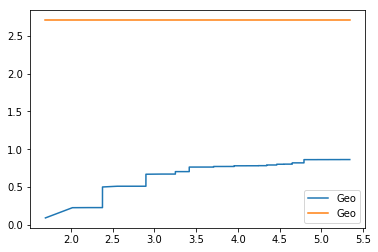

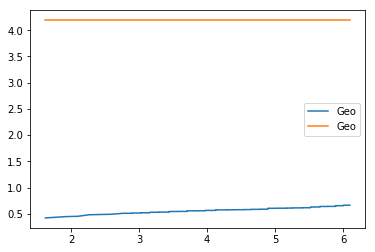

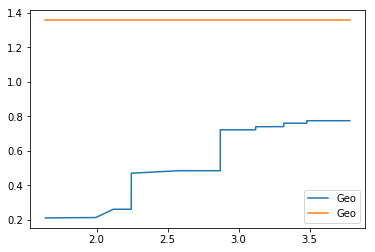

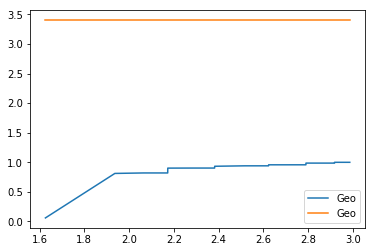

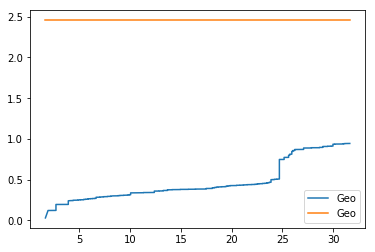

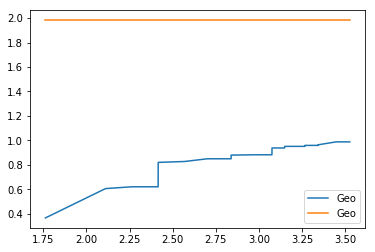

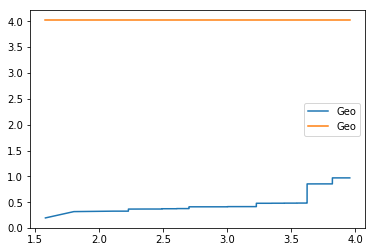

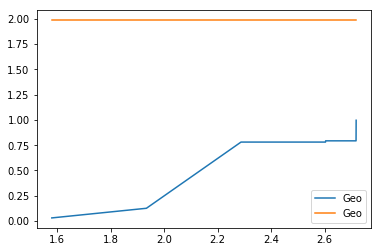

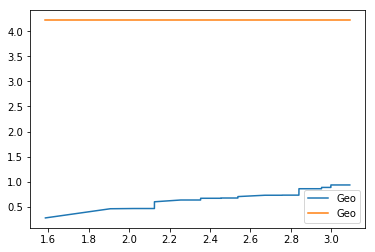

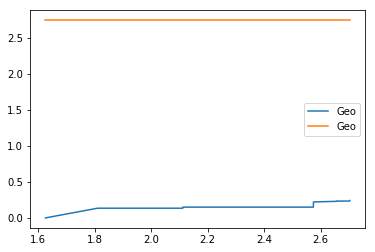

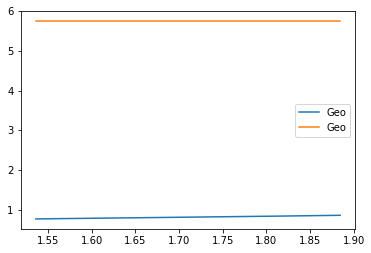

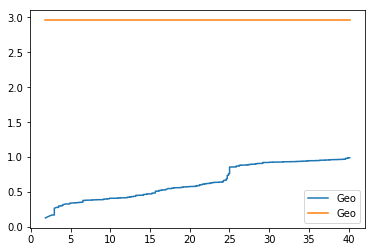

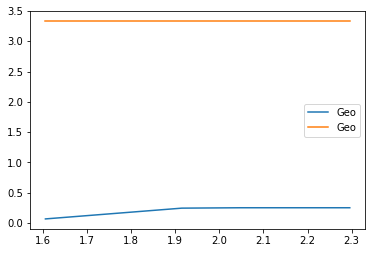

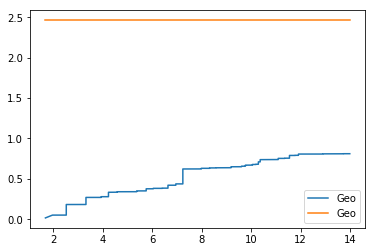

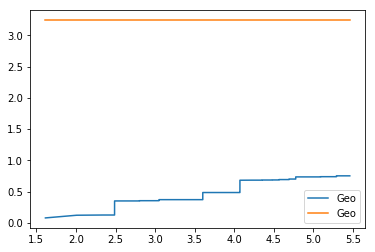

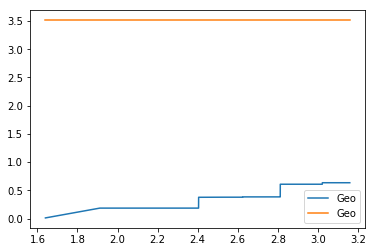

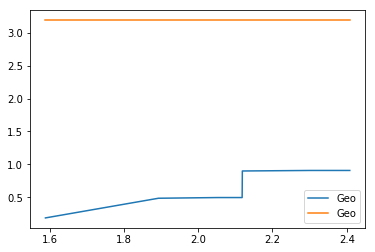

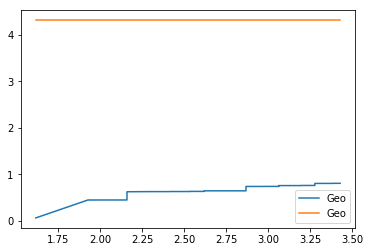

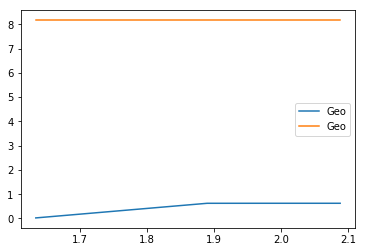

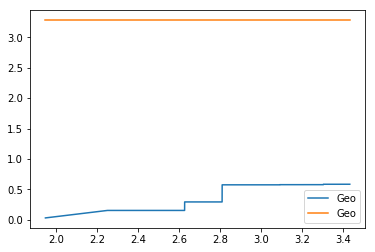

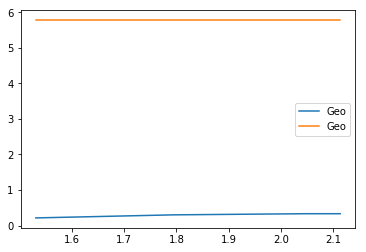

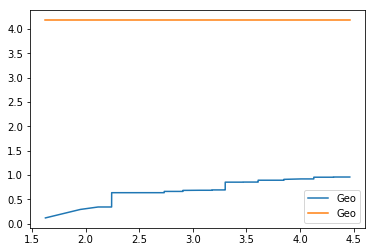

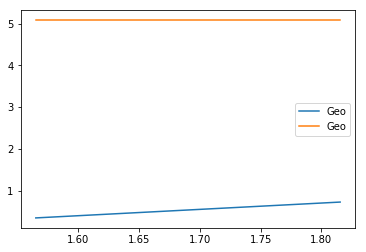

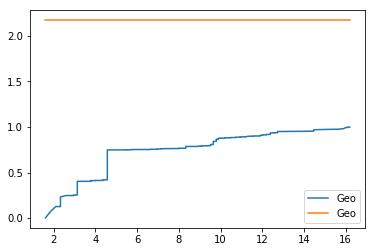

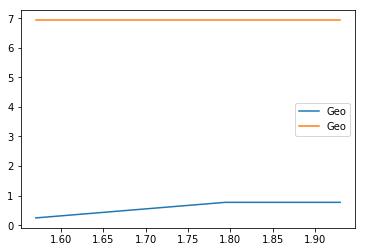

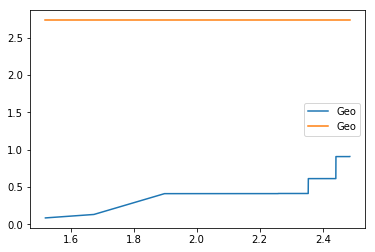

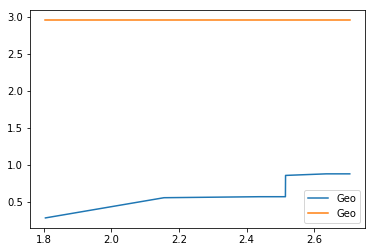

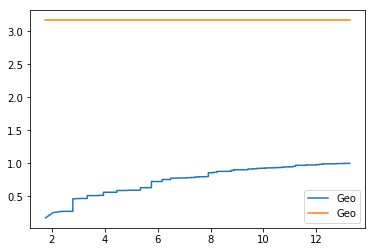

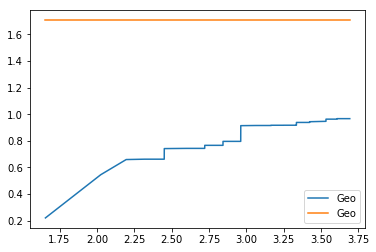

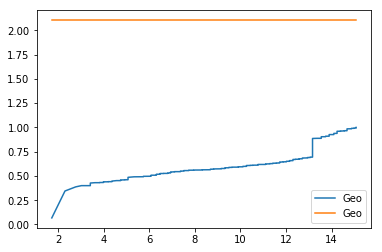

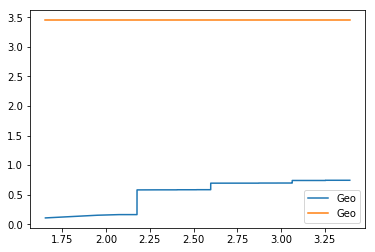

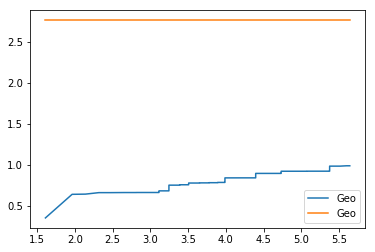

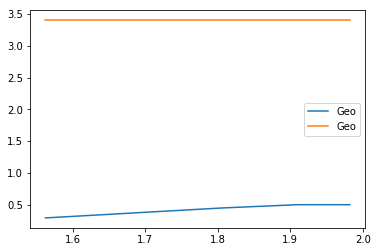

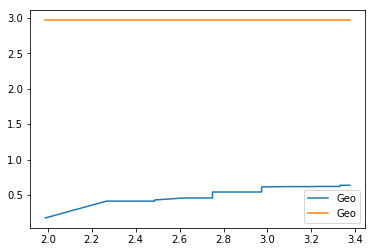

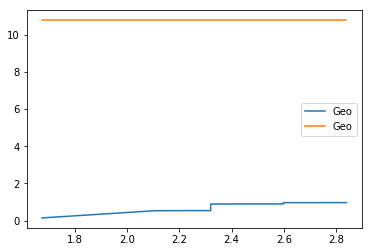

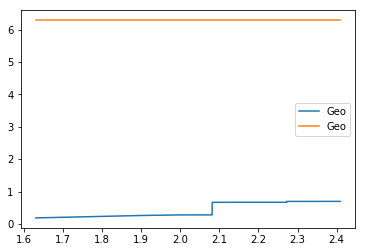

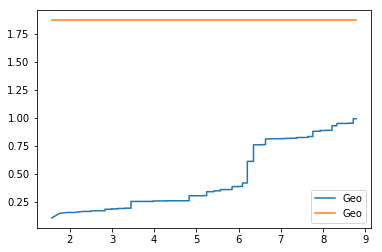

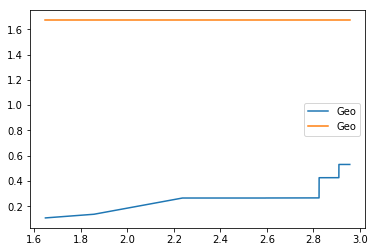

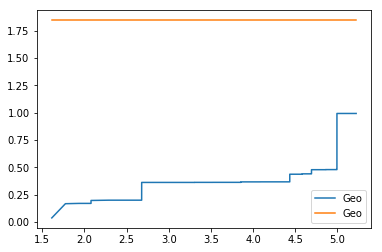

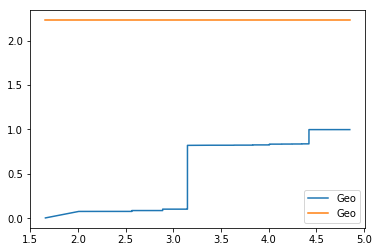

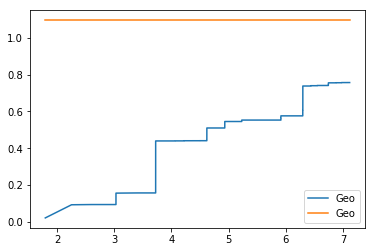

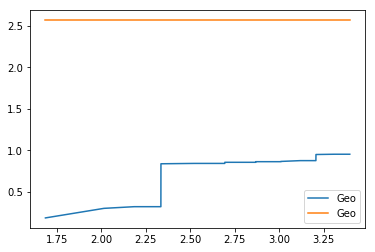

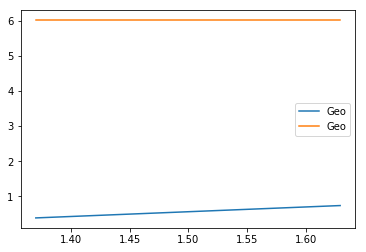

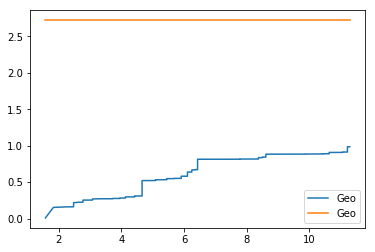

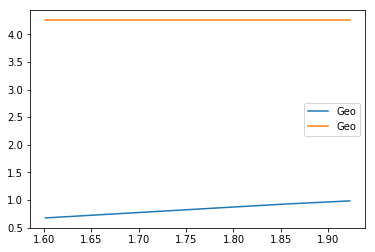

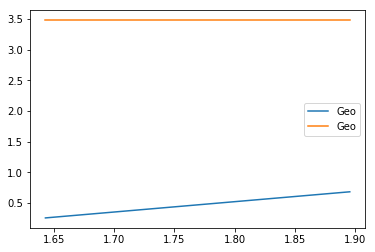

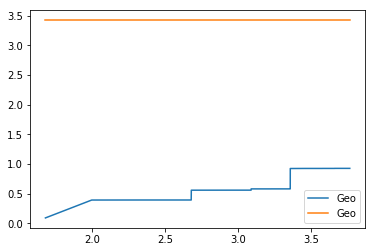

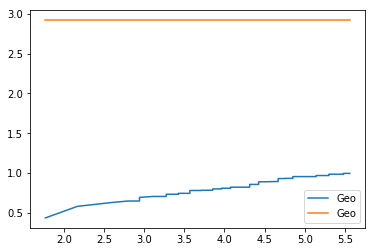

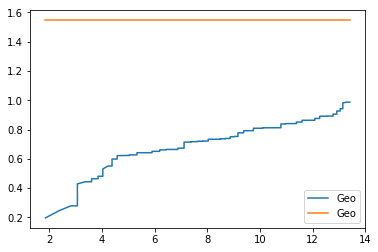

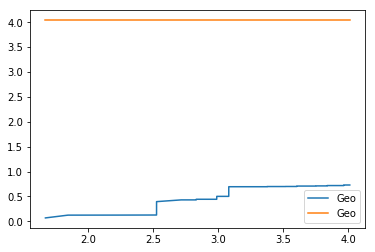

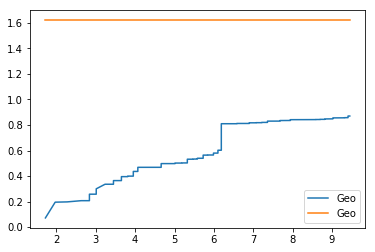

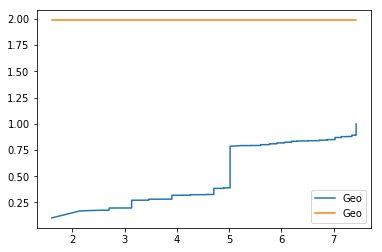

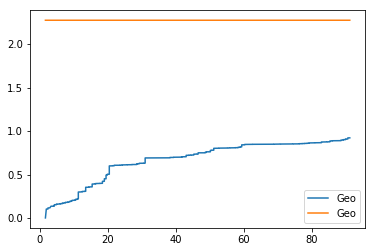

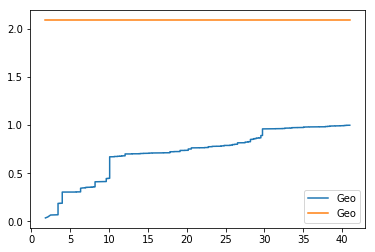

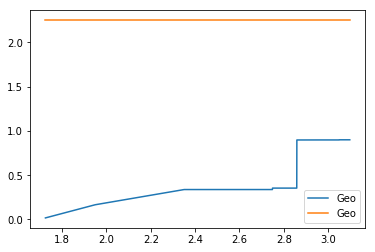

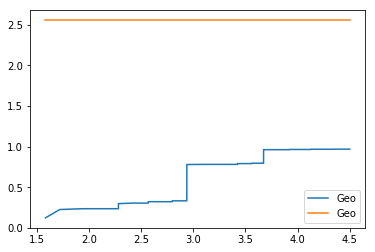

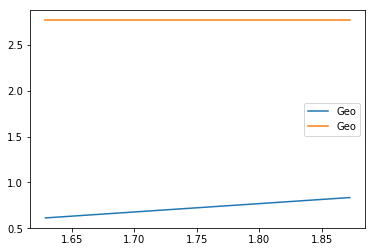

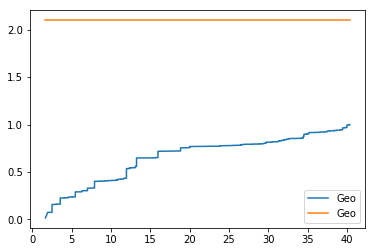

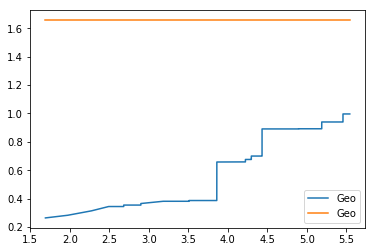

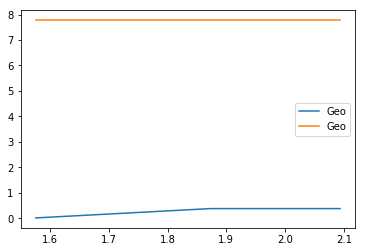

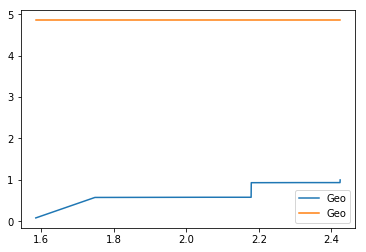

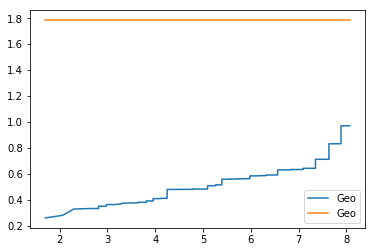

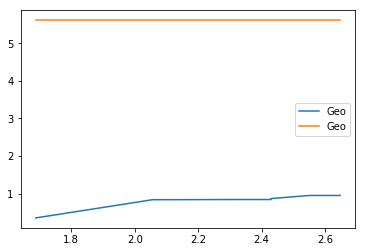

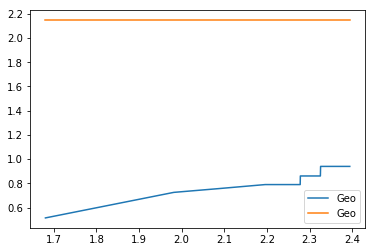

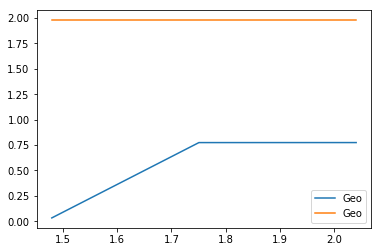

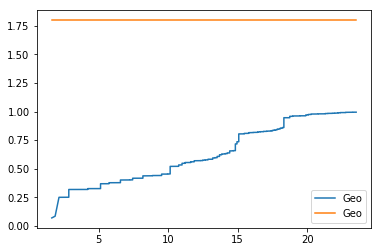

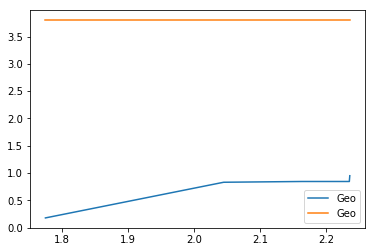

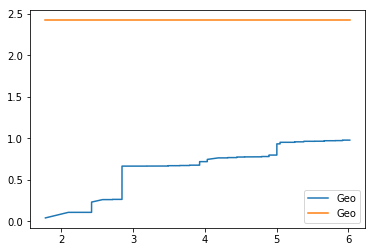

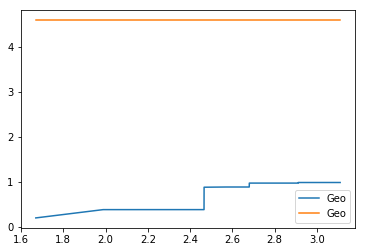

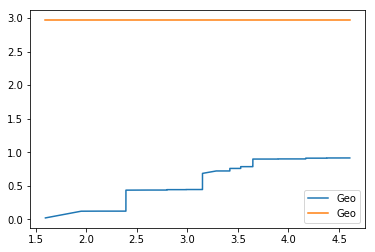

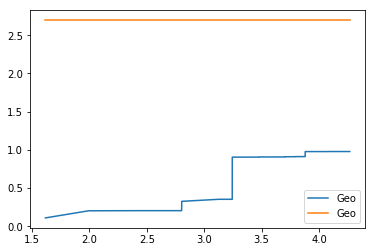

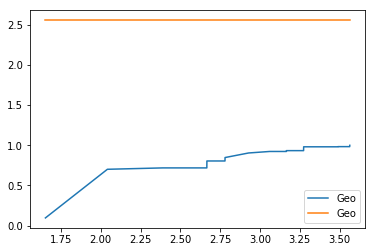

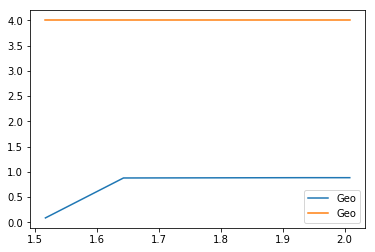

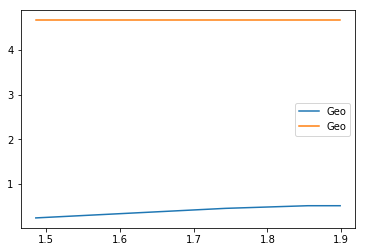

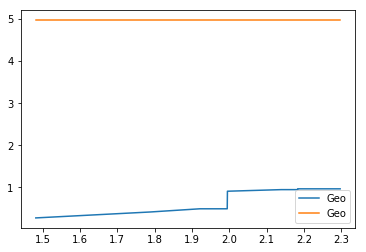

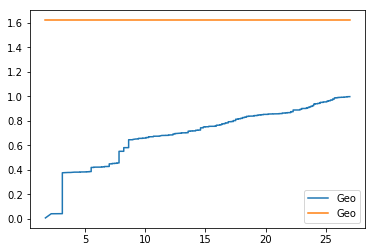

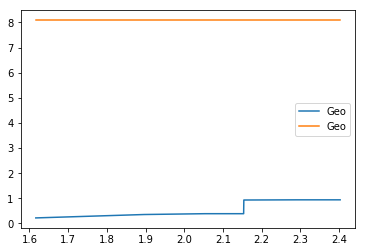

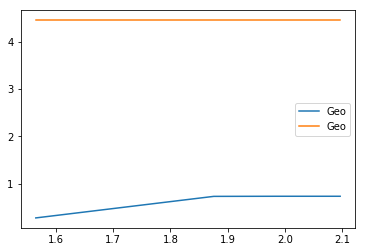

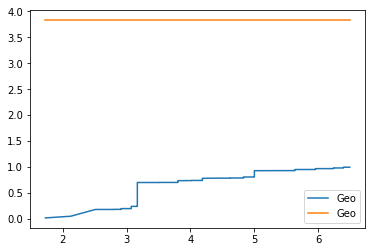

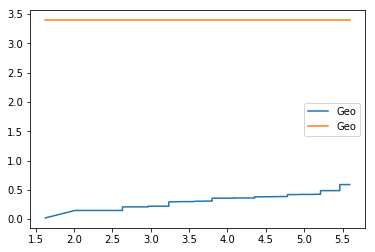

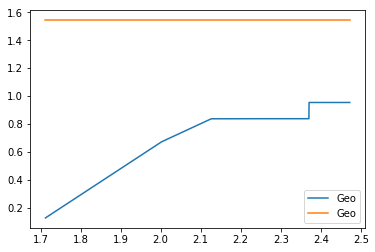

In [37]:
import matplotlib.pyplot as plt
import numpy as np

min_dists = output_dict['min_dists']
times = output_dict['times']
lb_stuff = output_dict['lower_bound_stuff']
ub_stuff = output_dict['upper_bound_stuff']

   
    for min_dist, lb_array, ub_array in zip(min_dists, lb_stuff, ub_stuff):
        # Iterating over each point
        ratios = []
        times = []
        for lb_tuple in lb_array:
            lb_time, lb_dist = lb_tuple
            ub_time, ub_dist = ub_tuple
            ratios.append(lb_dist / min_dist)
            times.append(lb_time)
        if len(ratios) > 1:
            plt.figure()
            plt.plot(times, ratios)
            plt.plot(times, ub_dist/min_dist*np.ones(len(times)))
            plt.show()
        

In [46]:
min_dists = output_dict['min_dists']
times = output_dict['times']
lb_stuff = output_dict['lower_bound_stuff']
ub_stuff = output_dict['upper_bound_stuff']
ratios = np.linspace(0.05, 1.0, 25)

list_to_average = []
for min_dist, lb_array, ub_array in zip(min_dists, lb_stuff, ub_stuff):
    # Iterating over each point
    times_to_ratios = []
    for ratio in ratios:
        for lb_tuple in lb_array:
            lb_time, lb_dist = lb_tuple
            ub_time, ub_dist = ub_tuple
            if lb_dist/min_dist >= ratio:
                times_to_ratios.append(lb_time)
                break
    list_to_average.append(np.asarray(times_to_ratios))

    
print(list_to_average[1])
averaged_times = np.average(list_to_average, axis=0)

plt.plot(averaged_times, ratios)

[]


ValueError: operands could not be broadcast together with shapes (16,) (0,) 

In [47]:
def test_acc(net, valset):
    err_acc = 0 
    err_count = 0 
    for data, labels in valset:
        data, labels = (data.cuda(), labels.cuda())
        n = data.shape[0]
        output = net(Variable(data.view(-1, 784)))
        err_acc += (output.max(1)[1].data != labels).float().mean() * n
        err_count += n

    print("Test Accuracy of: %.03f" % (1 - (err_acc / err_count).item()))


model_path = os.getcwd() + "/Models/"
network_names = [f for f in listdir(model_path) if isfile(join(model_path, f))]
network_names = network_names[3:-1]

for network_name in network_names:
    print(network_name)
    network = pickle.load(open(filepath, 'rb'))
    

['mnist_[20, 20, 20].pkl', 'mnist_[20, 20].pkl', '17_mnist_[20, 20, 20].pkl', '17_mnist__l1_[20, 20, 20].pkl', 'mnist__l1_[20, 20].pkl', '17_mnist_[20, 20].pkl']
['mnist_[20, 20, 20].pkl', 'mnist_[20, 20].pkl', '17_mnist_[20, 20, 20].pkl', '17_mnist__l1_[20, 20, 20].pkl', 'mnist__l1_[20, 20].pkl', '17_mnist_[20, 20].pkl']
['mnist_[20, 20, 20].pkl', 'mnist_[20, 20].pkl', '17_mnist_[20, 20, 20].pkl', '17_mnist__l1_[20, 20, 20].pkl', 'mnist__l1_[20, 20].pkl', '17_mnist_[20, 20].pkl']
['mnist_[20, 20, 20].pkl', 'mnist_[20, 20].pkl', '17_mnist_[20, 20, 20].pkl', '17_mnist__l1_[20, 20, 20].pkl', 'mnist__l1_[20, 20].pkl', '17_mnist_[20, 20].pkl']
['mnist_[20, 20, 20].pkl', 'mnist_[20, 20].pkl', '17_mnist_[20, 20, 20].pkl', '17_mnist__l1_[20, 20, 20].pkl', 'mnist__l1_[20, 20].pkl', '17_mnist_[20, 20].pkl']
['mnist_[20, 20, 20].pkl', 'mnist_[20, 20].pkl', '17_mnist_[20, 20, 20].pkl', '17_mnist__l1_[20, 20, 20].pkl', 'mnist__l1_[20, 20].pkl', '17_mnist_[20, 20].pkl']
